In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
ndf = df.drop(["PassengerId","Name","SibSp","Parch","Fare","Ticket","Cabin","Embarked"], axis='columns')
ndf.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
gender = {"male": 1, "female": 0}
ndf["Sex"] = ndf["Sex"].map(gender)

In [7]:
import numpy
ndf.head()
ndf.info()
ndf.fillna((numpy.mean(ndf['Age'])),inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [8]:
ndf.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [9]:
X=ndf.drop(["Survived"],axis="columns")
Y=ndf["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 891 samples and 4 features
X, Y = make_classification(n_samples=891, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
start_time = timeit.default_timer()
decision_tree.fit(X_train, Y_train)
training_time_dt = timeit.default_timer() - start_time

# Make predictions using the trained Decision Tree classifier
Y_pred_dt = decision_tree.predict(X_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)
print("F1 Score:", f1_dt)
print("Time Taken:", training_time_dt)


Decision Tree Classifier:
Accuracy: 0.9701492537313433
Recall: 0.9848484848484849
Precision: 0.9558823529411765
F1 Score: 0.9701492537313432
Time Taken: 0.006690499998512678


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have loaded and prepared your data: X_train, Y_train, X_test, Y_test

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn.fit(X_train, Y_train)

# Make predictions
Y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[131   5]
 [  1 131]]


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 891 samples and 4 features
X, Y = make_classification(n_samples=891, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the model to the training data
start_time = timeit.default_timer()
random_forest.fit(X_train, Y_train)
training_time_rf = timeit.default_timer() - start_time

# Make predictions using the trained Random Forest classifier
Y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1 Score:", f1_rf)
print("Time Taken:", training_time_rf)


Random Forest Classifier:
Accuracy: 0.9738805970149254
Recall: 0.9848484848484849
Precision: 0.9629629629629629
F1 Score: 0.9737827715355806
Time Taken: 0.7638289999995322


In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit

# Create a synthetic dataset with 891 samples and 4 features
X, Y = make_classification(n_samples=891, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()

# Fit the model to the training data
start_time = timeit.default_timer()
extra_trees.fit(X_train, Y_train)
training_time_et = timeit.default_timer() - start_time

# Make predictions using the trained ExtraTreesClassifier
Y_pred_et = extra_trees.predict(X_test)

# Calculate evaluation metrics for ExtraTreesClassifier
accuracy_et = accuracy_score(Y_test, Y_pred_et)
recall_et = recall_score(Y_test, Y_pred_et)
precision_et = precision_score(Y_test, Y_pred_et)
f1_et = f1_score(Y_test, Y_pred_et)

print("Extra Trees Classifier:")
print("Accuracy:", accuracy_et)
print("Recall:", recall_et)
print("Precision:", precision_et)
print("F1 Score:", f1_et)
print("Time Taken:", training_time_et)


Extra Trees Classifier:
Accuracy: 0.9738805970149254
Recall: 0.9848484848484849
Precision: 0.9629629629629629
F1 Score: 0.9737827715355806
Time Taken: 0.2966359999991255


In [1]:
imp.nlargest(3).plot(kind = 'bar')

NameError: name 'imp' is not defined

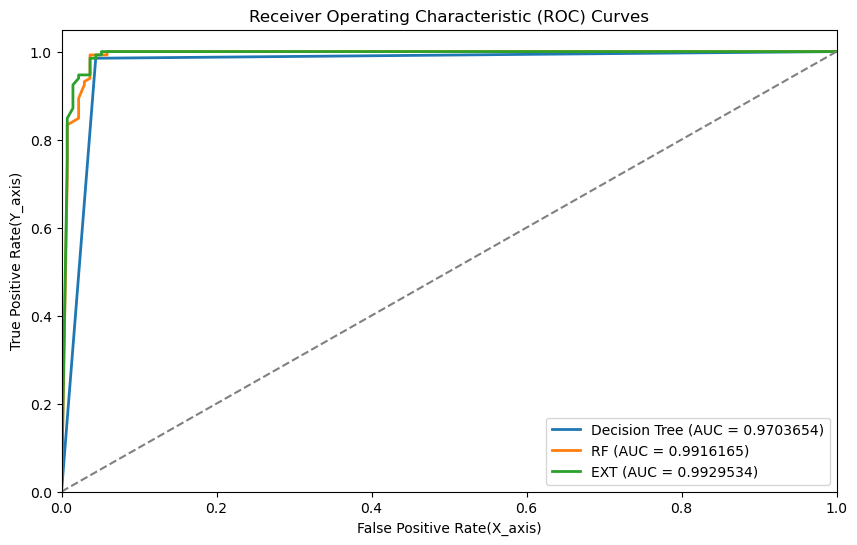

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Generate synthetic dataset
X, y = make_classification(n_samples=891, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
   
    'Decision Tree': DecisionTreeClassifier(),
'RF':RandomForestClassifier(),
'EXT':ExtraTreesClassifier()
}
    

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        clf.fit(X_train, y_train)
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(X_axis)')
plt.ylabel('True Positive Rate(Y_axis)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
